<a href="https://colab.research.google.com/github/nupur1262/trying_face_detection/blob/master/Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
my_file=files.upload()

In [2]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

In [3]:
!kaggle datasets download -d nupurpahuja09/facedetection

 75% 68.0M/91.2M [00:00<00:00, 95.2MB/s]
100% 91.2M/91.2M [00:00<00:00, 125MB/s] 


In [4]:
!unzip "*.zip"

Streaming output truncated to the last 5000 lines.
  inflating: not_me/197600.jpg       
  inflating: not_me/197601.jpg       
  inflating: not_me/197602.jpg       
  inflating: not_me/197603.jpg       
  inflating: not_me/197604.jpg       
  inflating: not_me/197605.jpg       
  inflating: not_me/197606.jpg       
  inflating: not_me/197607.jpg       
  inflating: not_me/197608.jpg       
  inflating: not_me/197609.jpg       
  inflating: not_me/197610.jpg       
  inflating: not_me/197611.jpg       
  inflating: not_me/197612.jpg       
  inflating: not_me/197613.jpg       
  inflating: not_me/197614.jpg       
  inflating: not_me/197615.jpg       
  inflating: not_me/197616.jpg       
  inflating: not_me/197617.jpg       
  inflating: not_me/197618.jpg       
  inflating: not_me/197619.jpg       
  inflating: not_me/197620.jpg       
  inflating: not_me/197621.jpg       
  inflating: not_me/197622.jpg       
  inflating: not_me/197623.jpg       
  inflating: not_me/197624.jpg       

In [5]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore")

In [9]:
import os
import shutil
os.makedirs('/content/train_data')
shutil.move('/content/not_me','/content/train_data/')
shutil.move('/content/me' , '/content/train_data/')

'/content/train_data/me'

In [10]:
tfms = get_transforms(do_flip=True, flip_vert=False, max_rotate=10.0, max_zoom=1.1, max_lighting=0.2, max_warp=0.2, p_affine=0.75, p_lighting=0.75, )
data = ImageDataBunch.from_folder(Path("train_data"), train=".", valid_pct=0.2,ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [11]:
data.classes

['me', 'not_me']

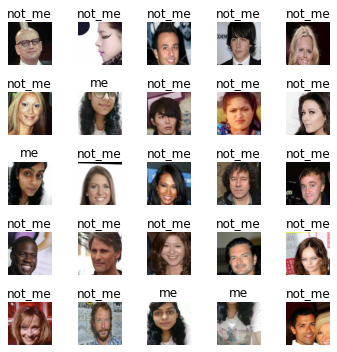

In [24]:
data.show_batch(rows=5, figsize=(5,5))

In [25]:
alexnet_learn=cnn_learner(data, models.alexnet, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


In [26]:
mobilenetv2_learn=cnn_learner(data, models.mobilenet_v2, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


##ALEXNET MODEL

In [27]:
alexnet_learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time


KeyboardInterrupt: ignored

In [ ]:
learn.save('stage-1')

In [ ]:
interp = ClassificationInterpretation.from_learner(alexnet_learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

##MOBILENETV2 MODEL

In [ ]:
mobilenetv2_learn.fit_one_cycle(8)

In [ ]:
learn.save('stage-2')

In [ ]:
interp = ClassificationInterpretation.from_learner(alexnet_learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

##SAVING THE MODEL